In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install transformers
!pip install datasets
!pip install bertviz
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


In [3]:
!pip install --upgrade datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: datasets
    Found existing installation: datasets 3.2.0
    Uninstalling datasets-3.2.0:
      Successfully uninstalled datasets-3.2.0


In [4]:
from datasets import load_dataset
emotion = load_dataset('emotion')

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [5]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
type(emotion)

datasets.dataset_dict.DatasetDict

In [7]:
# we see it is similar to a Python dictionary, with each key corresponding to a different
# split. And we can use the usual dictionary syntax to access an individual split:
train_ds = emotion["train"] # accessing dataset's key
train_ds
# this returns the instance of the dataset class. The dataset object is very important data structure in hugging face.

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [8]:
print(type(train_ds))
print(len(train_ds))

<class 'datasets.arrow_dataset.Dataset'>
16000


In [9]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [10]:

train_ds.column_names

['text', 'label']

In [11]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [12]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [13]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [14]:
emotion.set_format(type = 'pandas')


In [15]:
# underlying data structure has not changed. Though, now we can work with pandas like table.
type(emotion['train'])

datasets.arrow_dataset.Dataset

In [16]:
print(type(emotion['train'][:5]))
print(emotion['train'][:5])

<class 'pandas.core.frame.DataFrame'>
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [17]:
df = emotion['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [18]:
# Now, we also need a label (emotion type) for our texts.
classes = emotion['train'].features['label'].names

In [19]:
df['label_name'] = df['label'].apply(lambda x: classes[x])
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


**DATASET ANALYSIS BEGINS**

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [22]:
df['label_name'].value_counts(ascending = True)

label_name
surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: count, dtype: int64

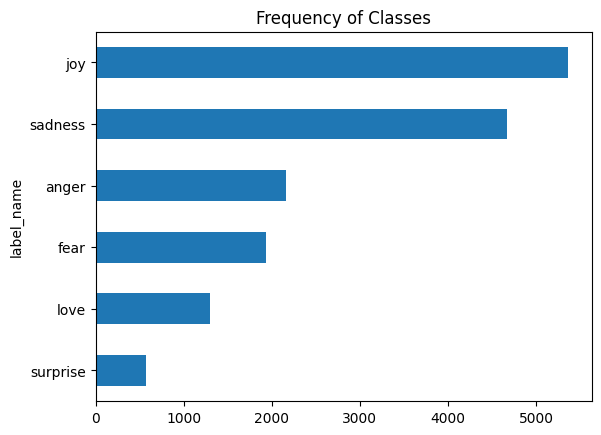

In [23]:
df['label_name'].value_counts(ascending = True).plot.barh()
plt.title('Frequency of Classes')
plt.show()

In [24]:
# No need to worry about the imbalance dataset cuz transformer works well with imbalance datasets

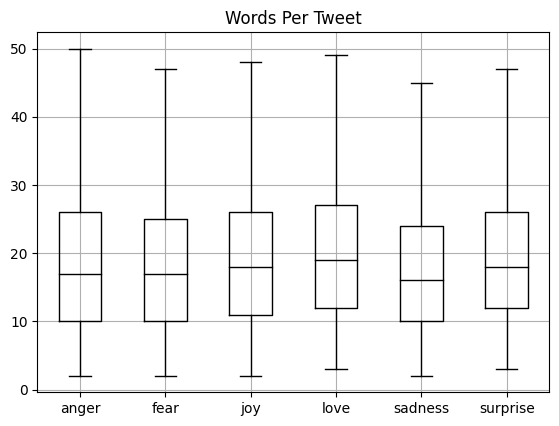

In [25]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet",
           by = "label_name",
           grid = True,
           showfliers = False,
           color = "black")
plt.suptitle("")
plt.xlabel("")
plt.show()



In [26]:
emotion.reset_format()
# as we're done with data analysis

In [27]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [28]:
'''
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)
'''

'\nfrom transformers import DistilBertTokenizer\ndistilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)\n'

In [29]:
text = '40 percent of my 20s is gone, but the question remains the same.'

Let's see how tokenizer works behind the hood


In [30]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2871, 3867, 1997, 2026, 27074, 2003, 2908, 1010, 2021, 1996, 3160, 3464, 1996, 2168, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [31]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', '40', 'percent', 'of', 'my', '20s', 'is', 'gone', ',', 'but', 'the', 'question', 'remains', 'the', 'same', '.', '[SEP]']


# the tokens have each been lowercased, which is a feature of this particular checkpoint.

In [32]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] 40 percent of my 20s is gone, but the question remains the same. [SEP]


The AutoTokenizer class also has several attributes that provide information about the tokenizer. Let's see few examples.

In [33]:
tokenizer.vocab_size

30522

In [34]:
tokenizer.model_max_length

512

In [35]:
# names of the fields that the model expects in 
#it's forward pass
tokenizer.model_input_names

['input_ids', 'attention_mask']

2. Why is this important?
When you tokenize text using a tokenizer, it generates outputs like input_ids, attention_mask, and sometimes additional fields (e.g., token_type_ids for certain models like BERT).
The model expects these fields to match the format defined in its architecture, and tokenizer.model_input_names ensures you know what the model needs.


# TOKENIZING THE WHOLE DATASET
To tokenize the whole corpus, we'll use the map() method for our DatasetDict object. This provides a convenient way to apply a processing function to each element in a dataset.

The first thing we need is a processing function to tokenize our examples with:

In [36]:
def tokenize(batch):
    return tokenizer(batch["text"], padding = True, truncation = True)

In [37]:
emotion["train"][:2]["text"]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake']

In [38]:
# passing a batch of 2 examples from the training set
print(tokenize(emotion["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [39]:
emotions_encoded = emotion.map(
    tokenize, batched = True, batch_size = None)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [40]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

# **USING TRANSFORMERS AS FEATURE EXTRACTOR**

In [41]:
from transformers import AutoModel
import torch

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

# we
freeze the body’s weights during training and use the hidden states as features for the
classifier. The advantage of this approach is that we can quickly train a small or shal‐
low model. Such a model could be a neural classification layer or a method that does
not rely on gradients, such as a random forest. This method is especially convenient if
GPUs are unavailable, since the hidden states only need to be precomputed once.
Similar to the AutoTokenizer class, AutoModel has a from_pretrained() method to
load the weights of a pretrained model. Let’s use this method to load the DistilBERT
checkpoint

Here we’ve used PyTorch to check whether a GPU is available or not, and then
chained the PyTorch nn.Module.to() method to the model loader. This ensures that
38 | Chapter 2: Text Classification
the model will run on the GPU if we have one. If not, the model will run on the CPU,
which can be considerably slower

The AutoModel class converts the token encodings to embeddings, and then feeds them thorugh the encoder stack to return the hidden states.

In [42]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [43]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

inputs is a dictionary containing the tokenized input tensors, typically including:
input_ids (tokenized words as IDs).
attention_mask (mask indicating which tokens are padded).
Optionally, other inputs like token_type_ids (for specific tasks).


In [44]:
device

device(type='cuda')

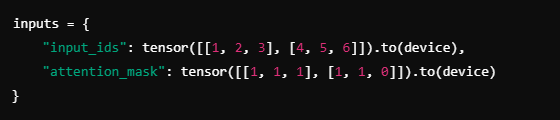
This is what the code below(first line) is doing.

In [45]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
 outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [46]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [47]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [48]:
def extract_hidden_states(batch):
    # place model inputs on GPU
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
        # Return vector for [CLS] token
        return {"hidden_state":last_hidden_state[:,0].cpu().numpy()}

In [49]:
type(outputs.last_hidden_state)

torch.Tensor

In [50]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [51]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [52]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

The map() method requires the processing function to return Python or Numpyt objects when we're using batched inputs.

Since out model expects tensors as inputs, the next thing to do is convert input_ids and attention_maask columns to the "torch" format.

In [53]:
emotions_encoded.set_format("torch",
                           columns = ["input_ids","attention_mask", "label"])

In [54]:
#  applying the extract_hidden_states function to the dataset emotions_encoded in batches
emotions_hidden = emotions_encoded.map(extract_hidden_states,batched = True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [55]:
emotions_hidden["train"]

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
    num_rows: 16000
})

In [56]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

Now that we have the hidden states associated with each tweet, the next step is to
train a classifier on them. To do that, we’ll need a feature matrix—let’s take a look.

In [57]:
import numpy as np

In [58]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

VISUALIZING THE TRAINING SET to ensure that the hidden state provide a useful representation of the emotions we want to classify

In [59]:
from sklearn.linear_model import LogisticRegression
# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.634

In [60]:
# training a simple classifier
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)


0.352

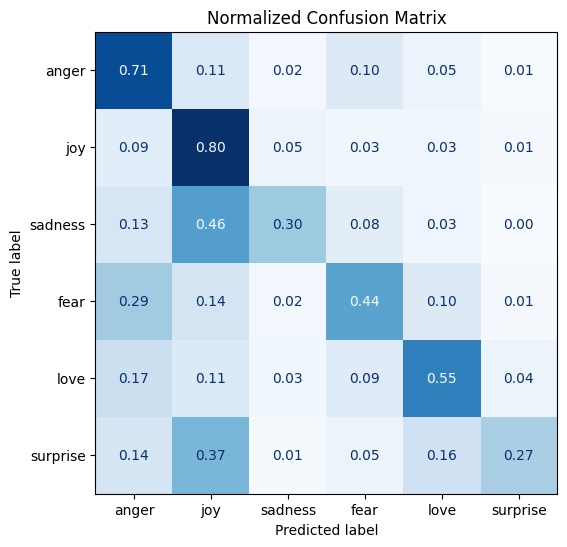

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Define function for plotting confusion matrix
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized Confusion Matrix")
    plt.show()

# Define labels here BEFORE calling the function
labels = ["anger", "joy", "sadness", "fear", "love", "surprise"]  # Modify based on your dataset

# Make predictions
y_preds = lr_clf.predict(X_valid)

# Call function with correct labels
plot_confusion_matrix(y_preds, y_valid, labels)


In [62]:
'''
We can see that anger and fear are most often confused with sadness, which agrees
 with the observation we made when visualizing the embeddings. Also, love and
 surprise are frequently mistaken for joy.
'''

'\nWe can see that anger and fear are most often confused with sadness, which agrees\n with the observation we made when visualizing the embeddings. Also, love and\n surprise are frequently mistaken for joy.\n'